# Car price version 3

### About Dataset
> This dataset contains information about used cars.
> This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
> The columns in the given dataset are as follows:

+ name
+ year
+ selling_price
+ km_driven
+ fuel
+ seller_type
+ transmission
+ Own

In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### EDA

#### Exploratory Data Analysis : 

> comprendre au maximum les données dont on
> dispose pour définir une stratégie de modélisation.
Checklist (non-exhaustive)
+ Analyse de forme :
    + Identification de la target
    + Nombre de lignes et de colonnes
    + Types de variables
    + Identification des valeurs manquantes

In [2]:
# import Datasets into a variable car_df

car_df = pd.read_csv("./Car details v3.csv")

#### Identification de la target

In [3]:
# identification de la target
car_df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [4]:
car_df.head().style.background_gradient(cmap="autumn")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000000



**`Target`**<br>
We will choose to predict the `selling_price`<br>


In [5]:
# Features

X =  car_df.drop(["name", "selling_price", "owner", "mileage", "engine", "max_power", "torque"], axis=1)

X 

,year,km_driven,fuel,seller_type,transmission,seats
0,2014,145500,Diesel,Individual,Manual,5.0
1,2014,120000,Diesel,Individual,Manual,5.0
2,2006,140000,Petrol,Individual,Manual,5.0
3,2010,127000,Diesel,Individual,Manual,5.0
4,2007,120000,Petrol,Individual,Manual,5.0
...,...,...,...,...,...,...
8123,2013,110000,Petrol,Individual,Manual,5.0
8124,2007,119000,Diesel,Individual,Manual,5.0
8125,2009,120000,Diesel,Individual,Manual,5.0
8126,2013,25000,Diesel,Individual,Manual,5.0


In [6]:
# Target
y = car_df[["selling_price"]]
y

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8123,320000
8124,135000
8125,382000
8126,290000


### Nombre de lignes et de colonnes

In [7]:
X.shape

(8128, 6)

### Variable Type

In [8]:
X.dtypes

year              int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
seats           float64
dtype: object

In [9]:
y

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8123,320000
8124,135000
8125,382000
8126,290000


#### Identification des valeurs manquantes

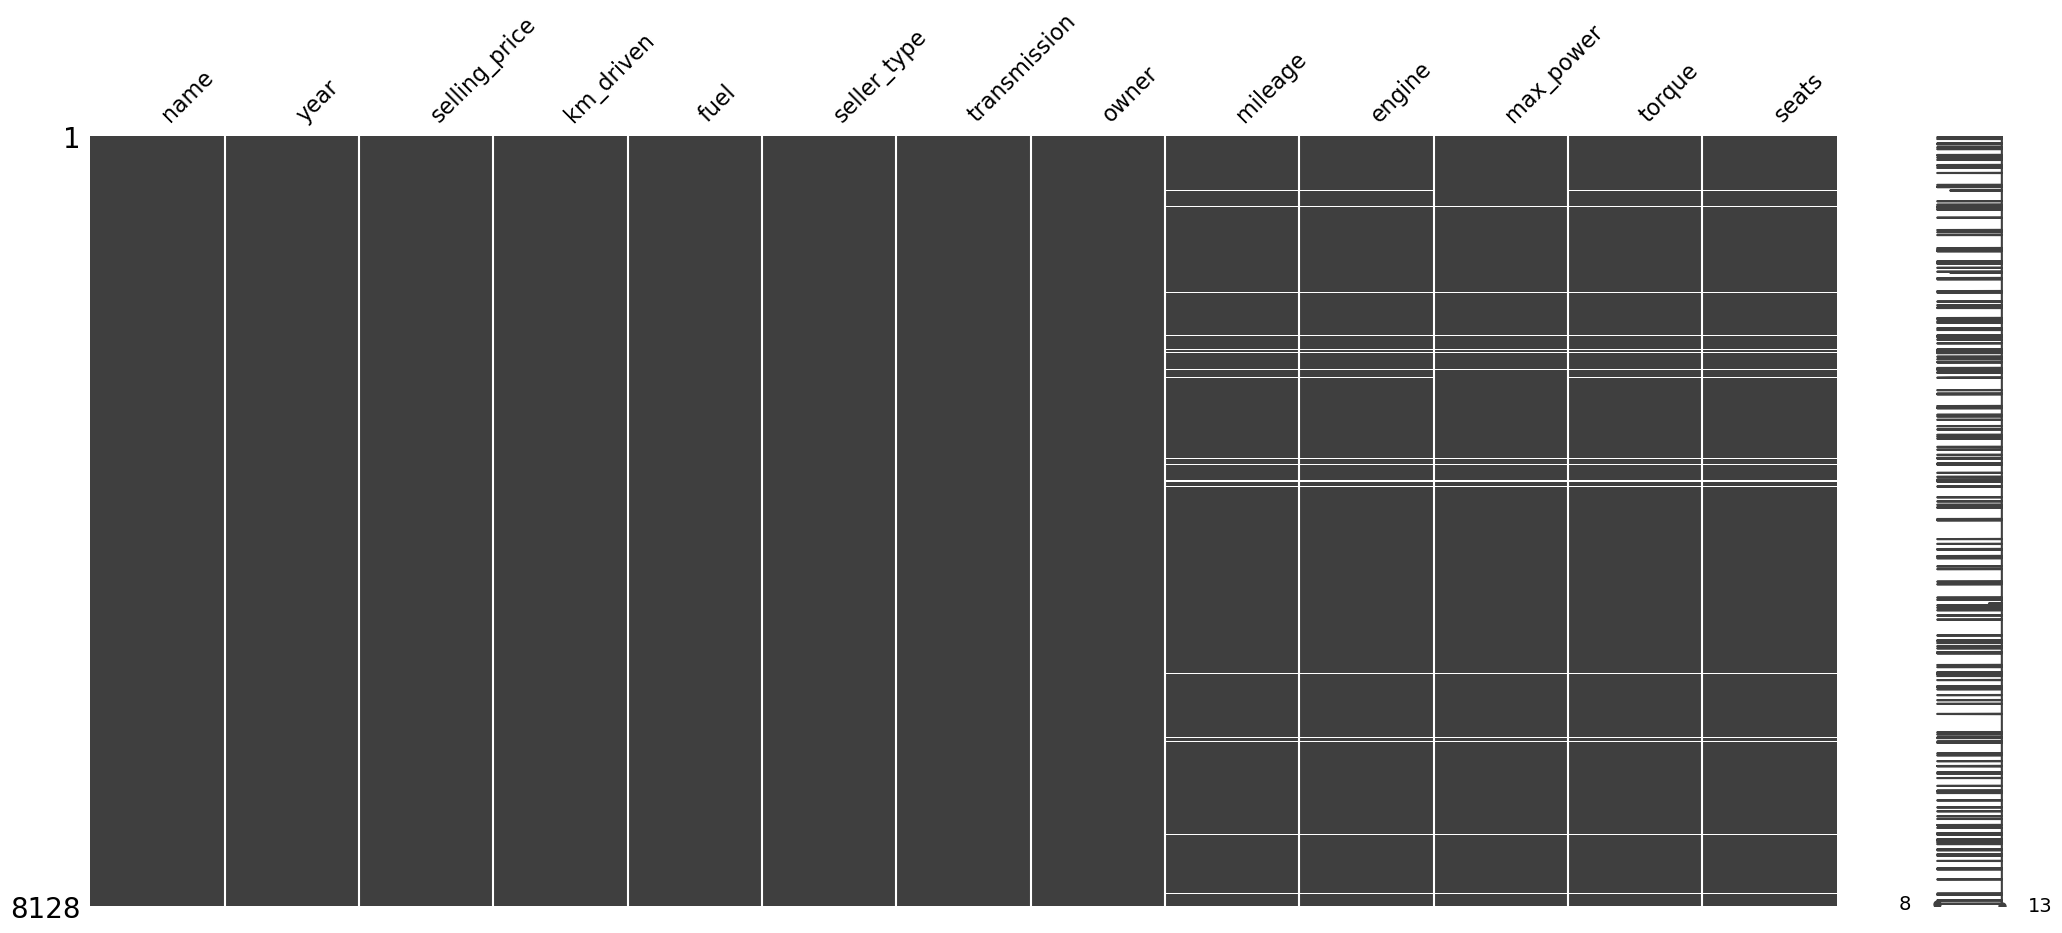

In [10]:
import missingno as msg
msg.matrix(car_df)
plt.show()

In [11]:
car_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

#### Missing Values

In [12]:
car_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

<Axes: >

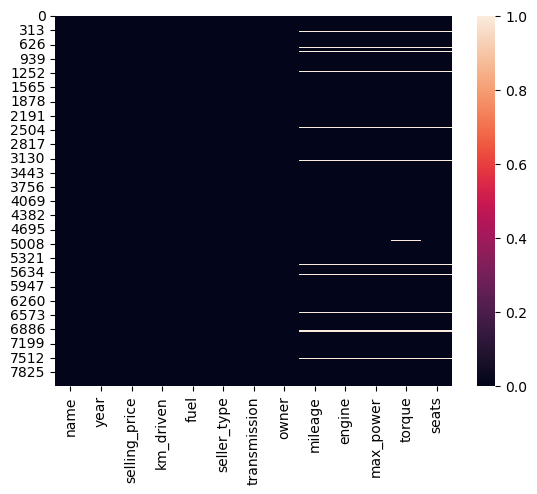

In [13]:
sns.heatmap(car_df.isnull())

+ Analyse du fond :
    + Visualisation de la target (Histogramme/Boxplot)
    + Compréhension des différentes variables (Internet)
    + Visualisation des relations features-target (Histogramme/Boxplot)
    + Identification des outliers

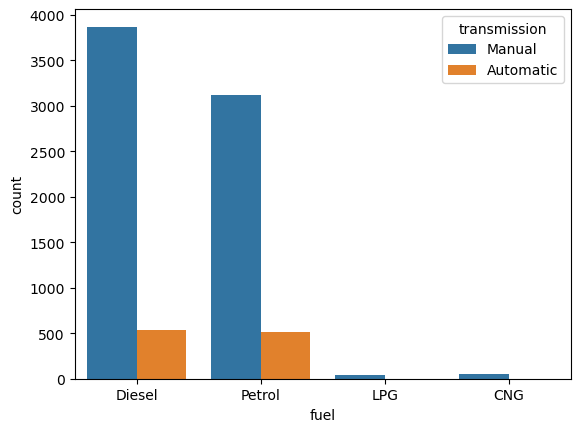

In [14]:

# Visualisation des Categorielles
sns.countplot(data=car_df, x="fuel", hue="transmission")
plt.show()

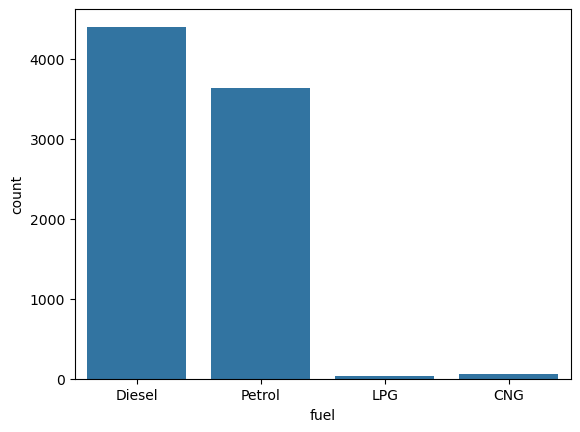

In [15]:
sns.countplot(data=car_df, x='fuel')
plt.show()

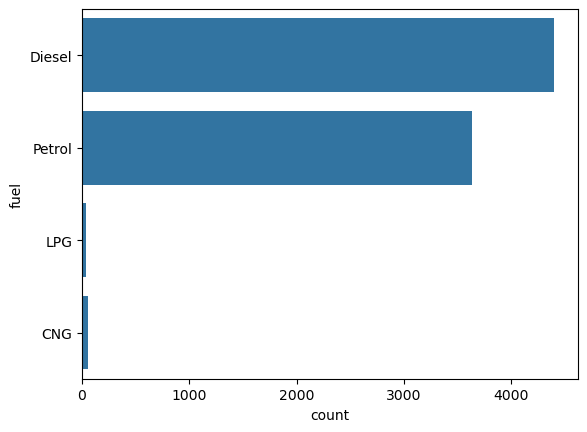

In [16]:
sns.countplot(data=car_df, y='fuel')
plt.show()

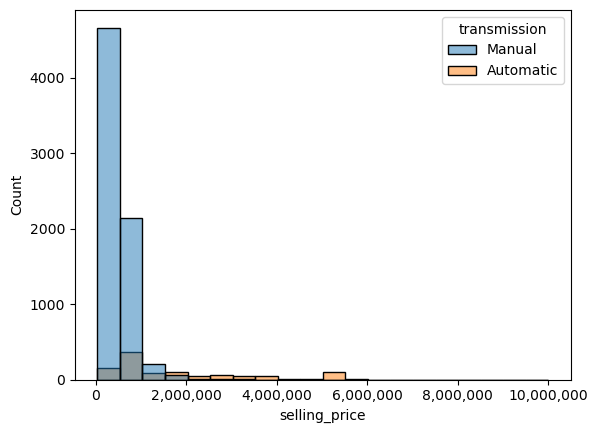

In [17]:
# Visualisation de la target (Histogramme/Boxplot)
import matplotlib.ticker as ticker


plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plot

sns.histplot(data=car_df, x="selling_price", hue="transmission", bins=20)
plt.show()

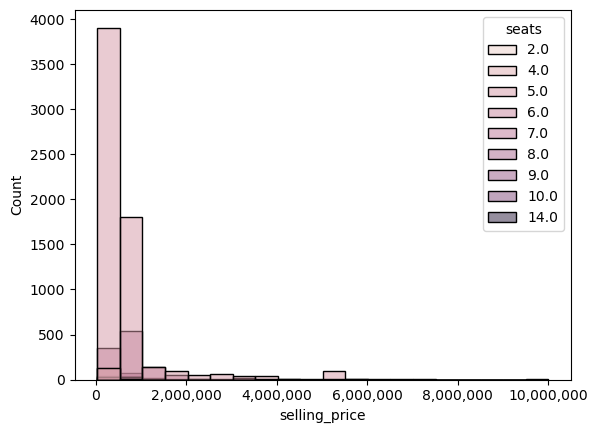

In [18]:
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.histplot(data=car_df, x="selling_price", hue="seats", bins=20)
plt.show()


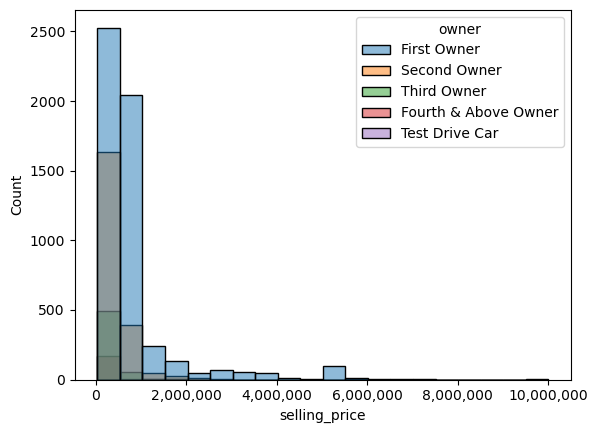

In [19]:
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.histplot(data=car_df, x="selling_price", hue="owner", bins=20)
plt.show()

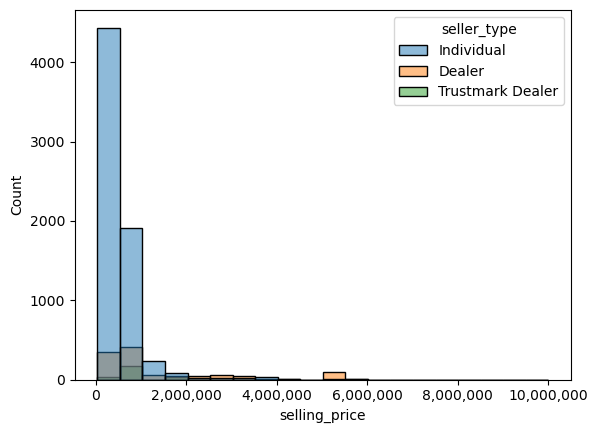

In [20]:
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.histplot(data=car_df, x="selling_price", hue="seller_type", bins=20)

plt.show()

In [21]:
print(car_df.describe(include="all"))

                          name         year  selling_price     km_driven  \
count                     8128  8128.000000   8.128000e+03  8.128000e+03   
unique                    2058          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           NaN   
freq                       129          NaN            NaN           NaN   
mean                       NaN  2013.804011   6.382718e+05  6.981951e+04   
std                        NaN     4.044249   8.062534e+05  5.655055e+04   
min                        NaN  1983.000000   2.999900e+04  1.000000e+00   
25%                        NaN  2011.000000   2.549990e+05  3.500000e+04   
50%                        NaN  2015.000000   4.500000e+05  6.000000e+04   
75%                        NaN  2017.000000   6.750000e+05  9.800000e+04   
max                        NaN  2020.000000   1.000000e+07  2.360457e+06   

          fuel seller_type transmission        owner    mileage   engine  \
count     8

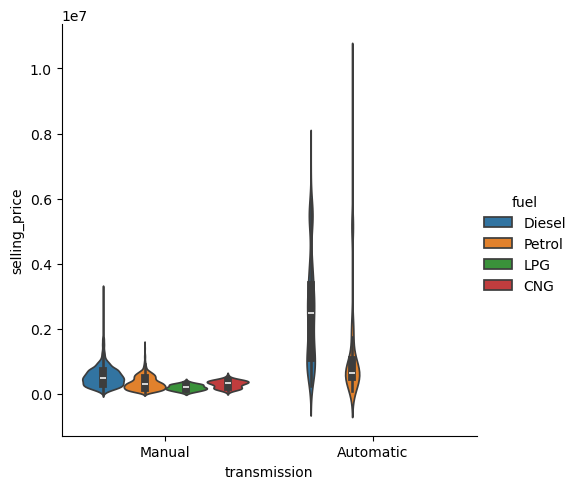

In [22]:
sns.catplot(x="transmission", y="selling_price", data=car_df, kind="violin", hue="fuel")

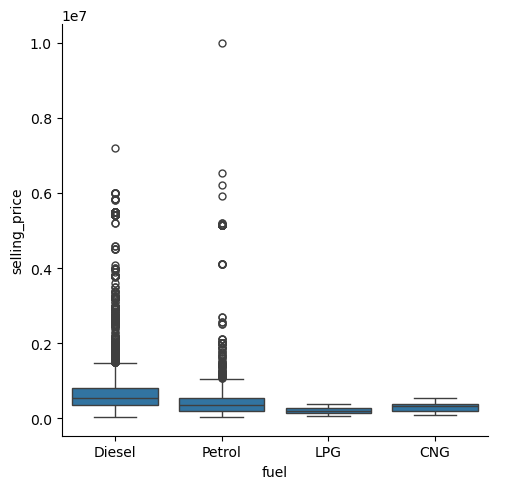

In [23]:
# Boxplot

sns.catplot(x="fuel", y="selling_price", data=car_df, kind="box")

Above $200K seems to be outliers...

#### Preprocessing : 


> transformer le data pour le mettre dans un format propice au
ML.
+ Checklist (non-exhaustive)
    + Création du Train / Test sets
    + Elimination des NaN : dropna(), imputation, colonnes « vides »
    + Encodage (var. catégorielles => dummies)
    + Suppression des outliers néfastes au modèle (à faire plutôt après avoir créer
un 1e modèle de Machine Learning)
    + Feature Selection (dans un 1e temps, éliminer les var. avec une variance nulle
et les variables redondantes)
    + Feature Engineering
    + Feature Scaling (MinMaxScaler/StandardScaler/RobustScaler)

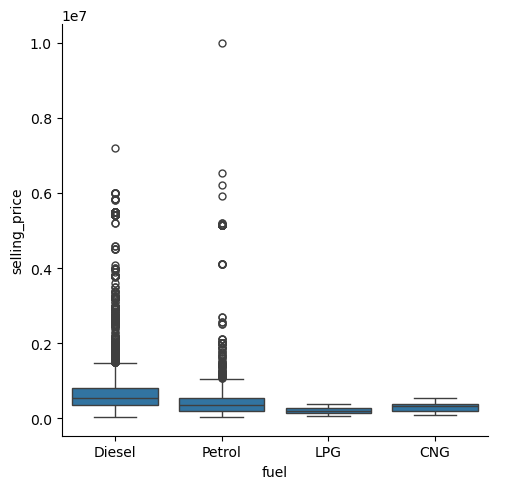

In [24]:
# Boxplot

sns.catplot(x="fuel", y="selling_price", data=car_df, kind="box")

#### Suppression des outliers

In [25]:
resonnable_car = car_df.loc[car_df.selling_price <= 500000, :]

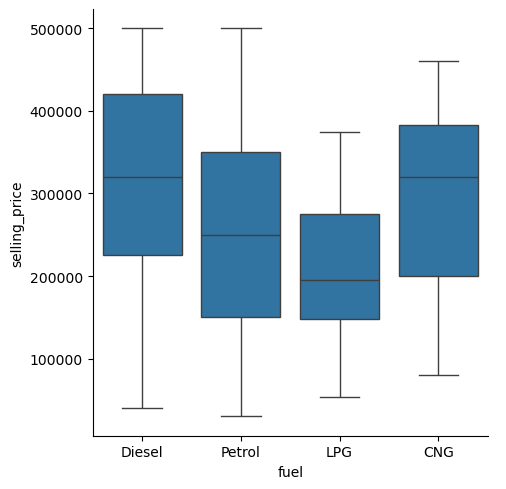

In [26]:
sns.catplot(x="fuel", y="selling_price", data=resonnable_car, kind="box")

#### Elimination des NANs : 
`missing values`

In [27]:
resonnable_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4639 non-null   object 
 1   year           4639 non-null   int64  
 2   selling_price  4639 non-null   int64  
 3   km_driven      4639 non-null   int64  
 4   fuel           4639 non-null   object 
 5   seller_type    4639 non-null   object 
 6   transmission   4639 non-null   object 
 7   owner          4639 non-null   object 
 8   mileage        4432 non-null   object 
 9   engine         4432 non-null   object 
 10  max_power      4436 non-null   object 
 11  torque         4431 non-null   object 
 12  seats          4432 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 507.4+ KB


In [28]:
resonnable_car = resonnable_car.dropna(axis=0)
resonnable_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4431 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4431 non-null   object 
 1   year           4431 non-null   int64  
 2   selling_price  4431 non-null   int64  
 3   km_driven      4431 non-null   int64  
 4   fuel           4431 non-null   object 
 5   seller_type    4431 non-null   object 
 6   transmission   4431 non-null   object 
 7   owner          4431 non-null   object 
 8   mileage        4431 non-null   object 
 9   engine         4431 non-null   object 
 10  max_power      4431 non-null   object 
 11  torque         4431 non-null   object 
 12  seats          4431 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 484.6+ KB


In [29]:
resonnable_car.selling_price.max()

500000

In [30]:
resonnable_car.selling_price.min()

29999

<Axes: xlabel='selling_price', ylabel='Count'>

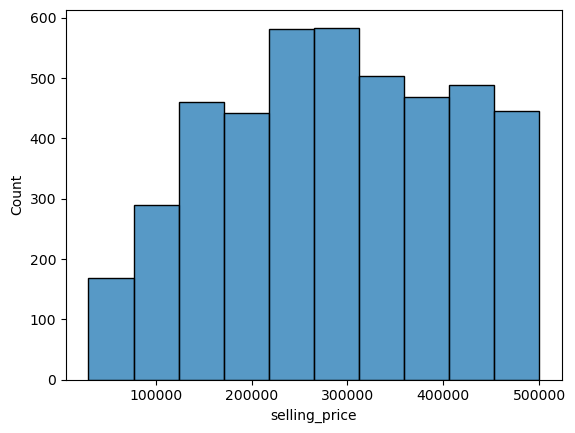

In [31]:
sns.histplot(data=resonnable_car.selling_price, bins=10)

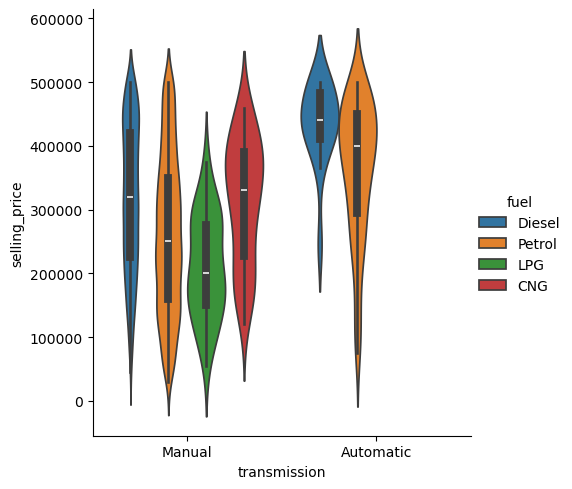

In [32]:
sns.catplot(x="transmission", y="selling_price", data=resonnable_car, kind="violin", hue="fuel")

### Feature Importance Analysis
1. **`Correlation Analysis`**: Check correlations between numerical features and the target variable selling_price.
1. **`Model-Based Feature Importance`**: Use models like Random Forest to get feature importance scores.
1. **`Recursive Feature Elimination` (RFE)**: Determine feature importance by recursively removing less important features.


---

### Choix des Variables (colonnes a garder)
1. **Analyse de Corrélation** : Vérifiez les corrélations entre les variables numériques et la variable cible `selling_price`.
2. **Importance des Variables Basée sur le Modèle** : Utilisez des modèles comme la Random Forest pour obtenir des scores d'importance des variables.
3. **Élimination Récursive des Variables (RFE)** : Déterminez l'importance des variables en supprimant récursivement les variables les moins importantes.

Ces trois méthodes se distinguent les unes des autres et peuvent parfois donner des résultats sensiblement différents en fonction de l'algorithme utilisé. Cependant, elles peuvent également être combinées pour obtenir une meilleure intuition dans le choix des variables.


Avant tout, nous devons convertir toutes les colonnes categorielles en numeriques et eliminer la colonne "name" qui ne nous est d'aucune utilite.

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Preprocessing for feature selection
# Convert categorical columns to numerical
copy_df = car_df.copy()

label_encoders = {}
for column in ['fuel', 'seller_type', 'transmission', 'owner']:
    le = LabelEncoder()
    copy_df[column] = le.fit_transform(copy_df[column])
    label_encoders[column] = le

# Extract numerical values from columns with units
copy_df['mileage'] = copy_df['mileage'].str.replace(
    r'kmpl|km/kg', '', regex=True).replace('', 'NaN').astype(float)
copy_df['engine'] = copy_df['engine'].str.replace(
    ' CC', '').replace('', 'NaN').astype(float)
copy_df['max_power'] = copy_df['max_power'].str.replace(
    ' bhp', '').replace('', 'NaN').astype(float)
copy_df['torque'] = copy_df['torque'].str.extract(
    '(\d+\.?\d*)').replace('', 'NaN').astype(float)

# Drop columns that are not needed for the analysis
copy_df.drop(columns=['name'], inplace=True)

1. **`Correlation Analysis`**<br>
Let's compute and visualize the **correlation matrix** *to see the relationship between `features` and `selling_price`*.

Heatmap for correlation matrix


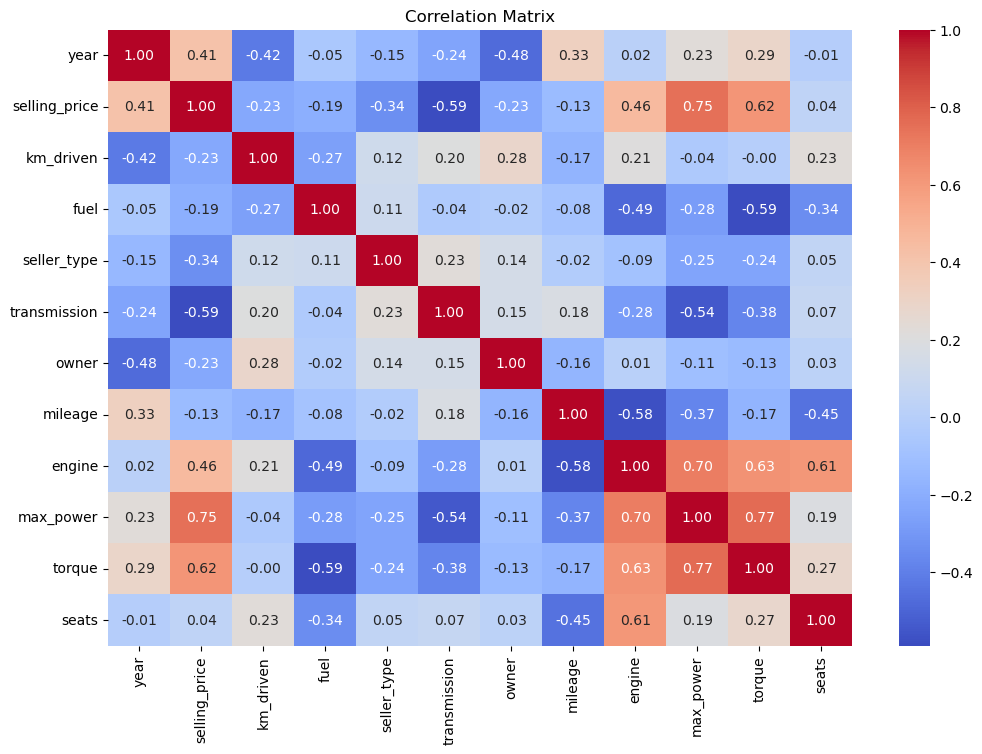

--------------->
Correlation with selling_price
selling_price    1.000000
max_power        0.748489
torque           0.619792
engine           0.455734
year             0.414092
seats            0.041358
mileage         -0.126054
fuel            -0.194029
km_driven       -0.225534
owner           -0.229174
seller_type     -0.335857
transmission    -0.588845
Name: selling_price, dtype: float64
--------------->


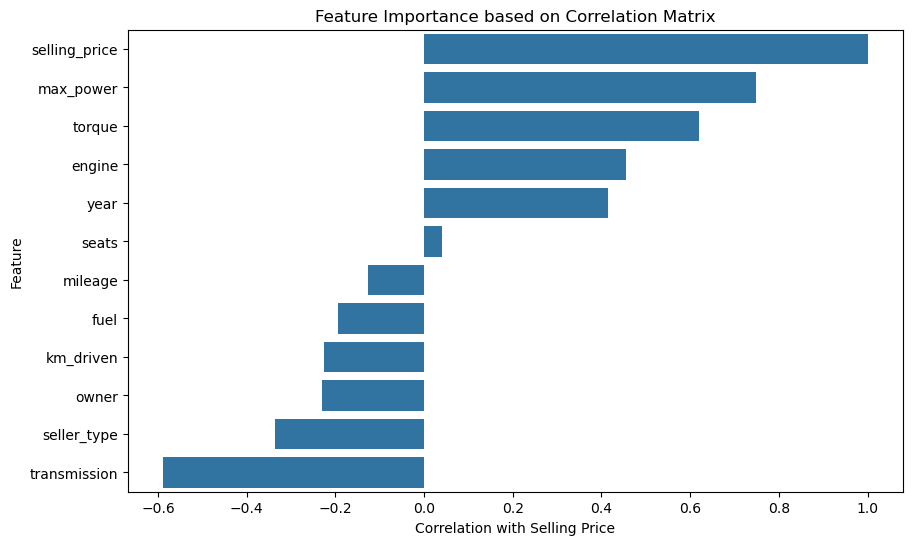

In [34]:
# Compute correlation matrix
correlation_matrix = copy_df.corr(numeric_only=True)

# Plot heatmap
print("Heatmap for correlation matrix")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Print correlation with selling_price
print("--------------->")
print("Correlation with selling_price")
print(correlation_matrix['selling_price'].sort_values(ascending=False))
print("--------------->")

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix['selling_price'].sort_values(
    ascending=False), y=correlation_matrix['selling_price'].sort_values(ascending=False).index)
plt.title('Feature Importance based on Correlation Matrix')
plt.xlabel('Correlation with Selling Price')
plt.ylabel('Feature')
plt.show()

En Valeur Absolue:
- Max Power
- Torque
- Engine
- Year
- Transmission 

<bt>ressortent des indices de correlations plus fortes que les autres variables.

2. **`Model-Based Feature Importance`**<br>
Use Random Forest to determine feature importance.

Features importances for a Random Forrest
--------------->
         Feature  Importance
8      max_power    0.704090
0           year    0.189331
9         torque    0.041321
1      km_driven    0.022579
6        mileage    0.015016
7         engine    0.013340
3    seller_type    0.005488
4   transmission    0.003042
5          owner    0.002030
10         seats    0.002026
2           fuel    0.001736
--------------->


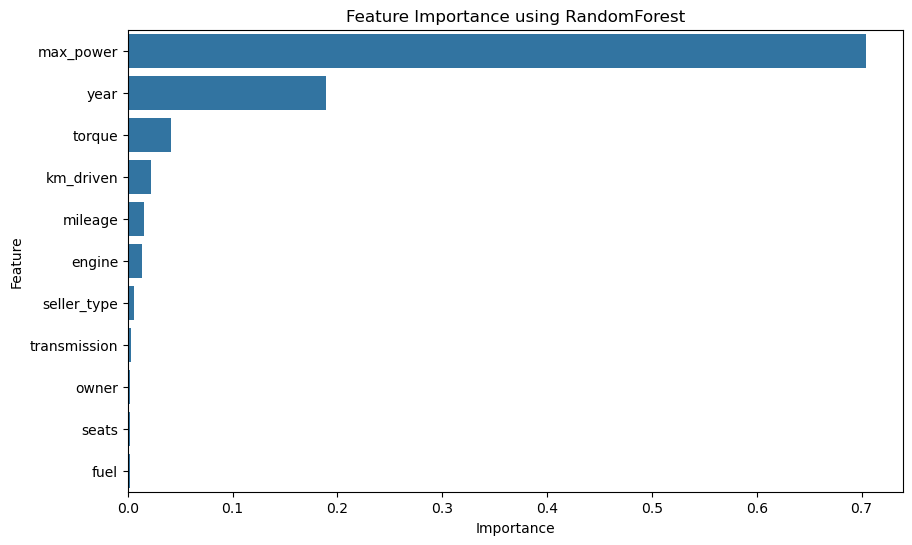

In [35]:
# Define features and target
X = copy_df.drop(columns=['selling_price'])
y = copy_df['selling_price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Features importances for a Random Forrest")
print("--------------->")
print(feature_importance_df)
print("--------------->")


# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance using RandomForest')
plt.show()

Here:
- `max_power` has the highest importance
- `Year` and `Torque` less
- in third group we see `km_driven`, `mileage`, `engine` with very low importance.

3. **`Recursive Feature Elimination (RFE)`**<br>
Use RFE with Linear Regression to determine feature importance.

> This method does not like missing values
> we should :
> + delete Nans
> + impute some other central values 
> + or choose an algorithm that does support missing values.

1. **Remove Rows with Missing** <br>
You can remove rows with missing values from your dataset. This is straightforward but might lead to loss of data if there are many missing values.

In [36]:
# Drop rows with any NaN values in X_train and y_train
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

2. **Impute Missing Values**<br>
You can fill in missing values using imputation techniques. Scikit-learn provides an SimpleImputer for this purpose.

**We will not use this method, it is just a info for snippet**

In [37]:
# from sklearn.impute import SimpleImputer

# # Create an imputer object with a strategy for handling missing values
# imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.

# # Fit the imputer on the training data and transform X_train
# X_train_imputed = imputer.fit_transform(X_train)

# # If you have missing values in y_train, handle them similarly
# y_train_imputed = y_train.dropna()

3. **Use Models that Handle Missing Values**<br>
Some models can handle missing values natively. For instance, HistGradientBoostingClassifier and HistGradientBoostingRegressor from scikit-learn can handle missing values.

*Example with Imputation*:
Here’s how you might modify your code to include imputation:

In [38]:
# import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE

# # Assuming X_train and y_train are your feature matrix and target vector

# # Impute missing values
# imputer = SimpleImputer(strategy='mean')  # or another strategy
# X_train_imputed = imputer.fit_transform(X_train)

# # Handle missing values in y_train if needed
# # y_train_imputed = y_train.dropna()  # Ensure this is aligned with X_train

# # Create and fit the model with RFE
# model = LinearRegression()
# rfe = RFE(estimator=model, n_features_to_select=1)
# rfe.fit(X_train_imputed, y_train)  # Use imputed X_train

# # RFE rankings
# rfe_ranking_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Ranking': rfe.ranking_
# }).sort_values(by='Ranking')

#### `RFE implementation`

In [39]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE
# Instantiate and fit RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=1)
rfe.fit(X_train, y_train)

# RFE rankings
rfe_ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print(rfe_ranking_df)

         Feature  Ranking
4   transmission        1
3    seller_type        2
2           fuel        3
0           year        4
10         seats        5
5          owner        6
8      max_power        7
6        mileage        8
9         torque        9
7         engine       10
1      km_driven       11



---

### Feature Importance Analysis for Car Price Prediction

The dataset includes various features that might influence the selling price of cars, such as `year`, `km_driven`, `fuel`, `seller_type`, `transmission`, `owner`, `mileage`, `engine`, `max_power`, `torque`, and `seats`. To better understand which features are most important in predicting the `selling_price`, we conducted an analysis using different methods. 

1. **Correlation Analysis**: This method checks how each feature correlates with the target variable `selling_price`. The analysis revealed that:
   - `max_power` has the highest positive correlation with the selling price.
   - `torque` and `engine` also show significant positive correlations.
   - On the other hand, features like `transmission`, `seller_type`, and `km_driven` have negative correlations with the selling price.

2. **Model-Based Feature Importance**: Using a Random Forest model to estimate feature importance, we found that:
   - `max_power` is the most important feature, accounting for over 70% of the total importance.
   - `year` and `torque` also contribute significantly to the model.
   - Other features such as `km_driven`, `mileage`, and `engine` have lower importance scores, while features like `fuel`, `seller_type`, and `transmission` are among the least important.

3. **Recursive Feature Elimination (RFE)**: This method ranks features by their importance in a model by recursively eliminating the least important features. The ranking highlights:
   - `transmission`, `seller_type`, and `fuel` as the most critical features for the model.
   - Conversely, `engine`, `km_driven`, and `seats` are considered the least important in this context.

These methods provide different perspectives on feature importance, and while their results may vary, they can be combined to gain a more comprehensive understanding of which features are most influential in predicting car prices. This combined approach helps in selecting the right features to build a robust predictive model.


Last list will be a mix of the most important features from all the methods:

`max_power` 
`torque`  
`engine` 
`transmission`
`seller_type`
`km_driven`
`seats`
`owner`

In [40]:
X = resonnable_car.loc[:,["max_power", 
"torque",  
"engine", 
"transmission",
"seller_type",
"km_driven",
"seats",
"owner"]]

In [41]:
y = resonnable_car[['selling_price']]

In [42]:
X.isnull().sum()

max_power       0
torque          0
engine          0
transmission    0
seller_type     0
km_driven       0
seats           0
owner           0
dtype: int64

In [43]:
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Assume X_train, y_train are your input data

# Polynomial Features Transformation
poly = PolynomialFeatures(degree=2)

# Logistic Regression model for RFE
model = LogisticRegression(max_iter=1000)

# Pipeline to combine PolynomialFeatures and RFE
pipeline = Pipeline([
    ('poly', poly),
    ('rfe', RFE(estimator=model, n_features_to_select=10))
])

# Timing the RFE process
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()

print(f"RFE with Polynomial Features took {end_time - start_time:.2f} seconds")

c:\Users\f.renaux\AppData\Local\anaconda3\envs\pythonAlgo\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\f.renaux\AppData\Local\anaconda3\envs\pythonAlgo\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

KeyboardInterrupt: 

#### Categoricals into numericals

Before pd.getdummies or OneHotEncoder, let us convert some columns into numerical columns.

In [ ]:
# Max Power
X.max_power.unique()[:3]

array([ 74.  , 103.52,  78.  ])

In [ ]:
X['max_power'] = X['max_power'].apply(lambda x: float(x.replace(" bhp", "")))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4431 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   max_power     4431 non-null   float64
 1   torque        4431 non-null   object 
 2   engine        4431 non-null   object 
 3   transmission  4431 non-null   object 
 4   seller_type   4431 non-null   object 
 5   km_driven     4431 non-null   int64  
 6   seats         4431 non-null   float64
 7   owner         4431 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.6+ KB


In [ ]:
# Engine
X.engine.unique()[:4]

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       '1198 CC', '1199 CC', '998 CC', '2179 CC', '1373 CC', '1598 CC',
       '1086 CC', '1196 CC', '1194 CC', '1172 CC', '1405 CC', '1798 CC',
       '999 CC', '2362 CC', '1493 CC', '1599 CC', '1341 CC', '799 CC',
       '1495 CC', '1047 CC', '2494 CC', '2956 CC', '1193 CC', '2523 CC',
       '1591 CC', '1120 CC', '624 CC', '1186 CC', '2354 CC', '814 CC',
       '1991 CC', '793 CC', '1799 CC', '936 CC', '1496 CC', '1582 CC',
       '1948 CC', '2997 CC', '2498 CC', '2489 CC', '2609 CC', '1150 CC',
       '1994 CC', '1388 CC', '1527 CC', '995 CC', '2499 CC', '1586 CC',
       '1390 CC', '1368 CC', '909 CC', '1339 CC', '1998 CC', '2092 CC',
       '1595 CC', '1499 CC', '1596 CC', '1299 CC', '1590 CC', '1597 CC',
       '2953 CC', '1794 CC', '1795 CC', '1896 CC', '1968 CC', '1796 CC',
       '1997 CC', '1422 CC', '1489 CC', '1995 CC', '2197 CC', 

In [ ]:
X['engine'] = X['engine'].apply(lambda x: float(x.replace(" CC", "")))
X['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 4431, dtype: float64

In [ ]:
# Transmission
X.transmission.unique()[:4]

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
# seller_type
X.seller_type.unique()[:4]

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
# owner
X.owner.unique()[:4]

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

In [ ]:
# Torque is difficult topic
X.torque.unique()[:]

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '62Nm@ 3000rpm', '114Nm@ 3500rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '60Nm@ 3500rpm',
       '90Nm@ 3500rpm', '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm',
       '146Nm@ 4800rpm', '200Nm@ 1750rpm', '200Nm@ 1750-3000rpm',
       '111.7Nm@ 4000rpm', '219.6Nm@ 1500-2750rpm', '250Nm@ 1500-3000rpm',
       '130Nm@ 4000rpm', '99.04Nm@ 4500rpm', '77Nm@ 3500rpm',
       '110Nm@ 3750rpm', '101Nm@ 3000rpm', '120Nm@ 4250rpm',
       '96 Nm at 3000 rpm', '135Nm@ 2500rpm', '173Nm@ 4000rpm',
       '200Nm@ 1900rpm', '91Nm@ 4250rpm', '96.1Nm@ 3000rpm',
       '153Nm@ 3800rpm', '113Nm@ 4200rpm', '224Nm@ 4000rpm',
       '113Nm@ 4500rpm', '114Nm

In [ ]:
# Example DataFrame
data = {
    'fuel': ['CNG', 'Diesel', 'Petrol', 'LPG', 'Diesel'],
    'mileage': ['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl']
}

car_df = pd.DataFrame(data)

# Function to extract numeric mileage and convert if needed


def convert_kmpkg_to_kmpl(row):
    # Fuel densities in kg/L
    densities = {
        'CNG': 0.72,
        'Diesel': 0.832,
        'Petrol': 0.74,
        'LPG': 0.54
    }

    # Get the fuel type and mileage from the row
    fuel_type = row['fuel']
    mileage_str = row['mileage']

    # Extract numeric part of mileage
    if 'kmpl' in mileage_str:
        # It's already in kmpl, so just extract the number
        mileage = float(mileage_str.replace(' kmpl', ''))
    elif 'km/kg' in mileage_str:
        # Convert km/kg to kmpl
        mileage = float(mileage_str.replace(' km/kg', ''))
        if fuel_type in densities:
            mileage *= densities[fuel_type]
        else:
            raise ValueError(
                "Invalid fuel type. Please choose from 'CNG', 'Diesel', 'Petrol', or 'LPG'.")
    else:
        raise ValueError("Unknown mileage unit. Expected 'kmpl' or 'km/kg'.")

    return mileage


# Apply the conversion function to each row and replace the original mileage column
car_df.apply(convert_kmpkg_to_kmpl, axis=1)

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
dtype: float64

In [ ]:
import re

# Define function to convert torque from kgm to Nm
def convert_to_nm(value, unit):
    if unit == 'kgm':
        return float(value) * 9.80665  # 1 kgm = 9.80665 Nm
    return float(value)

# Define function to extract torque and rpm


def extract_torque_and_rpm(torque_str):
    # Normalize the input string
    torque_str = torque_str.lower().replace(
        ' ', '').replace('(', '').replace(')', '')

    # Match patterns for torque and rpm
    match = re.match(r'([0-9.]+)(kgm|nm)?@([0-9+-]+)rpm', torque_str)
    if match:
        value, unit, rpm = match.groups()
        unit = unit if unit else 'nm'  # Default to Nm if no unit is given

        # Convert to Nm if necessary
        torque_nm = convert_to_nm(value, unit)

        # Handle RPM range
        if '-' in rpm:
            rpm_min, rpm_max = map(int, rpm.split('-'))
        else:
            rpm_min = rpm_max = int(rpm)

        return torque_nm, rpm_min, rpm_max

    return None, None, None


# Apply the function to the DataFrame
X[['torque_nm', 'rpm_min', 'rpm_max']] = X['torque'].apply(
    lambda x: pd.Series(extract_torque_and_rpm(x)))

X

,max_power,torque,engine,transmission,seller_type,km_driven,seats,owner,torque_nm,rpm_min,rpm_max
0,74.00,190Nm@ 2000rpm,1248 CC,Manual,Individual,145500,5.0,First Owner,190.0,2000.0,2000.0
1,103.52,250Nm@ 1500-2500rpm,1498 CC,Manual,Individual,120000,5.0,Second Owner,250.0,1500.0,2500.0
2,78.00,"12.7@ 2,700(kgm@ rpm)",1497 CC,Manual,Individual,140000,5.0,Third Owner,NaN,NaN,NaN
3,90.00,22.4 kgm at 1750-2750rpm,1396 CC,Manual,Individual,127000,5.0,First Owner,NaN,NaN,NaN
4,88.20,"11.5@ 4,500(kgm@ rpm)",1298 CC,Manual,Individual,120000,5.0,First Owner,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8123,82.85,113.7Nm@ 4000rpm,1197 CC,Manual,Individual,110000,5.0,First Owner,113.7,4000.0,4000.0
8124,110.00,"24@ 1,900-2,750(kgm@ rpm)",1493 CC,Manual,Individual,119000,5.0,Fourth & Above Owner,NaN,NaN,NaN
8125,73.90,190Nm@ 2000rpm,1248 CC,Manual,Individual,120000,5.0,First Owner,190.0,2000.0,2000.0
8126,70.00,140Nm@ 1800-3000rpm,1396 CC,Manual,Individual,25000,5.0,First Owner,140.0,1800.0,3000.0


In [ ]:
categoricals = list(X.columns[X.dtypes == object])

In [ ]:
categoricals

['torque', 'transmission', 'seller_type', 'owner']

In [ ]:
X.max_power.unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '46.3 bhp',
       '64.1 bhp', '83.81 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '40.3 bhp', '138.03 bhp', '116.3 bhp', '67.05 bhp',
       '98.63 bhp', '88.8 bhp', '78.9 bhp', '88.76 bhp', '108.62 bhp',
       '93.7 bhp', '103.6 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp',
       '73 bhp', '94.68 bhp', '65 bhp', '69.01 bhp', '138.1 bhp',
       '83.8 bhp', '62.1 bhp', '81.80 bhp', '164.7 bhp', '68 bhp',
       '75 bhp', '85.8 bhp', '100 bhp', '87.2 bhp', '53 bhp', '118 bhp',
       '103.2 bhp', '83.14 bhp', '83 bhp', '86.8 bhp', '58.16 bhp',
       '82.85 bhp', '53.3 bhp', '80 bhp', '94 bhp', '82.9 bhp',
       '83.11 bhp', '70 bhp', '69 bhp', '99.6 bhp', '102 bhp',
       '88.73 bhp', '120 bhp', '88.7 bhp', '63 bhp', '121.3 bhp',
       '79.4 bhp', '84 bhp', '63.1 bhp', '66.1 bhp'

In [ ]:

# from sklearn.preprocessing import OneHotEncoder
# #
# pd.get_dummies()

OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', drop="first")

X_new = enc.fit_transform(X).toarray()

In [ ]:
enc.get_feature_names_out()

array(['max_power_100.57 bhp', 'max_power_100.6 bhp', 'max_power_101 bhp',
       ..., 'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Third Owner'], dtype=object)

In [ ]:
enc.inverse_transform(X_new[0].reshape(1,-1))

array([['74 bhp', '190Nm@ 2000rpm', '1248 CC', 'Manual', 'Individual',
        145500, 5.0, 'First Owner']], dtype=object)

1 Train Test Split

In [46]:
filtre = copy_df.selling_price <= 500000
important_cols = ["max_power", "engine", "transmission", "seller_type", "km_driven", "owner", "selling_price"]

In [47]:
cp_resonable_df=copy_df.loc[filtre,important_cols]

In [48]:
cp_resonable_df.dropna(axis=1,inplace=True)

In [49]:
x=cp_resonable_df.drop(["selling_price"],axis=1)
y= cp_resonable_df.selling_price

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
 

ValueError: Found input variables with inconsistent numbers of samples: [4431, 4639]

2. Fitting ==> model.fit(Xtrain, ytrain)

In [44]:
# import linearRegression, DecisionTreeRegressor, lassoRegressor

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor

# instaces of models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()
lasso_model = Lasso(alpha=0.1)

# fitting models
lr_model.fit(X_train,y_train)
dt_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

##### 3. Scoring ==> Evaluation 
   model.score(X_train, y_train) score de train <br>
   model.score(X_test, y_test) score de test

In [45]:
# .... put your code below

lr_model.score(X_test,y_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

4. New prediction ==> model.predict


To know the correct format. check X_train[0], X_train.columns


lr_model.predict()

5. Prediction function for my app

In [ ]:
def ...(car, model):
    # preparation de donn¶es
    
    # return model.predict()

In [ ]:
name  =  input("hello What is your name ? ")
 
 
## Question related to input features
year = int(input("When does the car was manufactured ?"))
fuel = int(input("what type fuel is it ?"))
transmission = input("Automatic or Manual transmission ?")
seller_type = input("is the seller a 'Individual', 'Dealer' or 'Trustmark Dealer' ?")
km_driven = float(input("What is Kilometers driven of this car ? "))
owner = input("is it a 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner' or 'Test Drive Car' car ?")
 

In [ ]:
# def prepocess_data(year,fuel,transmission,seller_type,km_driven,owner):
#     preprocess_data ={
#         "year":year,
#         "km_driven":km_driven,
#         "fuel":fuel,
#         "seller_type":seller_type,
#         "transmission":transmission,
#         "owner":owner
#     }
#     return pd.DataFrame(prepocess_data)

In [ ]:
def preprocess_data(year, fuel, transmission, seller_type, km_driven, owner):
   
    fuel_list = ['Diesel', 'Petrol', 'LPG', 'CNG']
     # seller_type
    seller_type_list =['Individual', 'Dealer', 'Trustmark Dealer']
    owner_list = ['First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner', 'Test Drive Car']
 
   
    preprocessed_data = {
        'year': year,
        'km_driven': km_driven,
        'fuel': fuel_list.index(fuel),
        'seller_type': seller_type_list.index(seller_type),
        'transmission': transmission=="Automatic",
        'owner': owner_list.index(owner)
    }
   
   
    return pd. DataFrame(preprocessed_data)